# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy.stats import shapiro
import numpy as np
from scipy import stats
import seaborn as sns
os.chdir('/Users/armitasafavi/downloads/EDA_human_temperature')
df = pd.read_csv('data/human_body_temperature.csv')

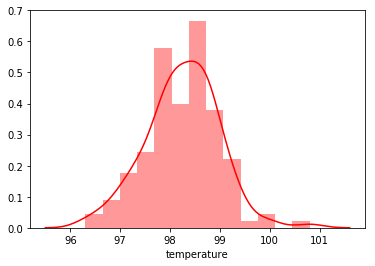

In [12]:
# 1. Is the distribution of body temperatures normal?

sns.distplot(df['temperature'],color='red', hist=True)
plt.show()

In [13]:
df.head()


,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [14]:
temp = df['temperature']
temp_array = np.asarray(temp)

In [15]:
def normality_test(array, alpha=0.05):
    stat, p = shapiro(array)
    if p > alpha:
        print('Sample Distribution looks normal')
    else:
        print(' Sample Distribution does not look normal')

In [16]:
normality_test(temp_array)

Sample Distribution looks normal


In [17]:
#2. Is the sample size large? Are the observations independent?

df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


In [18]:
n =len(df['temperature'])
n

130

n > 30 so sample is large enough. Observations are independent. it appears that the CLT for a normal distribution would apply to this dataset.

In [19]:
# 3. Is the true population mean really 98.6 degrees F?
#-bootstrap hypothesis test

#null hypothesis and alternative hypothesis
# H0  μ ≠ 98.6
# Ha  μ = 98.6
# alpha = 0.05
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    bs_replicates = np.empty([size])
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates



In [29]:
population_mean = 98.6
sample_mean = np.mean(temp_array)
sample_mean = 98.24923076923075
alpha = 0.05

In [22]:
bs_replicates = draw_bs_reps(temp_array,np.mean,size=10000)


In [27]:
p = np.sum(bs_replicates <= 98.24923076923075)/10000
p
print('p-value =', p)

p-value = 0.5089


In [30]:
if p < alpha :
    print('we reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')
    


we fail to reject the null hypothesis


Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
Since we are testing a null hypothesis the t-test should compare one sample mean to a null hypothesis value, 
so we are using a one-sample test
In this situation, is it appropriate to use the  t  or  z  statistic?
since n> 30 we use the t-test and also while dealing with means we use t-tests

null hypothesis and alternative hypothesis
H0  μ ≠ 98.6
Ha  μ = 98.6

In [9]:
stats.ttest_1samp(df['temperature'], popmean=98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

In [31]:
t = -5.45482
p_value = 2.4106320
if p_value < alpha :
    print('we reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')

we fail to reject the null hypothesis


4.Draw a small sample of size 10 from the data and repeat both frequentist tests.
Which one is the correct one to use?
What do you notice? What does this tell you about the difference in application of the  t  and  z  statistic?


In [33]:
sample_10 =np.random.choice(df['temperature'], 10)
sample_10

array([98.6, 97.4, 98. , 98.4, 97.7, 97.9, 98.5, 97.7, 97.5, 98. ])

In [34]:
stats.ttest_1samp(sample_10, popmean=98.6)

Ttest_1sampResult(statistic=-4.783660530571617, pvalue=0.0009961700483453763)

In [39]:
SE = np.std(sample_10)/np.sqrt(10)

z_test = (np.mean(sample_10) - 98.6)/SE
z_test

-5.042420943218615

In [40]:
#Given our z_test p value is going to be 
p_value = 0.00001

In [41]:

if p_value < alpha :
    print('we reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')

we reject the null hypothesis


for smaller sample sets z test is the correct test to use.

At what temperature should we consider someone's temperature to be "abnormal"?
As in the previous example, try calculating everything using the boostrap approach, 
as well as the frequentist approach.
Start by computing the margin of error and confidence interval. 
When calculating the confidence interval, 
keep in mind that you should use the appropriate formula for one draw, and not N draws.

Bootstrap approcach



In [44]:
bs_replicates = draw_bs_reps(temp_array, np.mean,10000)
conf_int_low, conf_int_high= np.percentile(bs_replicates, [2.5,97.5])
print('95% confidence interval =', conf_int_low, conf_int_high)

95% confidence interval = 98.12307692307692 98.37615384615384


In [24]:
bs_margin_of_error =  float(df['temperature'].mean() - 98.12307692307692)
bs_margin_of_error

0.12615384615385494

In [21]:
CI_low, CI_high = stats.norm.interval(0.95, loc=df['temperature'].mean(), scale=df['temperature'].std())
CI_low, CI_high

(96.81221818540311, 99.68624335305844)

In [31]:
mu= 98.6
x=98.249231
n = len(df['temperature'])
Z=float((x-mu)/((np.std(df['temperature']))/np.sqrt(n)))
Z

-5.47592159949596

In [33]:
CI_l, CI_h = (x-Z , x+Z)

In [34]:
CI_l, CI_h

(103.72515259949596, 92.77330940050403)

In [22]:
margin_of_error = float(df['temperature'].mean() - CI_low)
margin_of_error

1.4370125838276664

Is there a significant difference between males and females in normal temperature?
What testing approach did you use and why?
Write a story with your conclusion in the context of the original problem

H0  F_mean = M_mean
Ha  F_mean ≠ M_mean
alpha = 0.05

In [36]:
gender_df = df[['temperature', 'gender']]
m_temp = gender_df[gender_df.gender=='M']
f_temp = gender_df[gender_df.gender=='F']
stats.ttest_ind(m_temp['temperature'],f_temp['temperature'])

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.02393188312239561)

In [43]:
pvalue=0.02393188312239561
if pvalue <0.05:
    print('we can reject the null hypothesis that male and female population have the same mean.')
else: 
    print('we fail to reject the null hypothesis. ')

we can reject the null hypothesis that male and female population have the same mean.


we can conclude that female and male body temperature have a different mean.

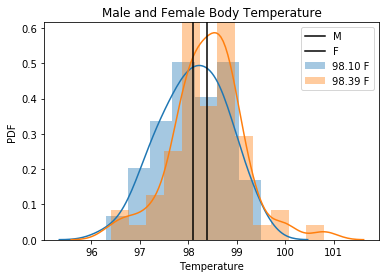

In [56]:
sns.distplot(m_temp['temperature'], hist=True)
sns.distplot(f_temp['temperature'], hist = True)
plt.xlabel('Temperature')
plt.ylabel('PDF')
plt.title('Male and Female Body Temperature')
plt.axvline(np.mean(m_temp['temperature']), color = 'k')
plt.axvline(np.mean(f_temp['temperature']), color = 'k')
plt.legend(['M', 'F', '98.10 F', '98.39 F'])
plt.show()